In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('articles_dataset.csv')
# filtrando alguns símbolos poluíndo o dataset
articles_df = df.replace(r'\r+|\n+|\t+','', regex=True)
articles_df = articles_df.replace(',,,','', regex=True)
articles_df = articles_df.replace(',,','', regex=True)
articles_df = articles_df.replace('’','', regex=True)
articles_df = articles_df.replace('—','', regex=True)
articles_df = articles_df.replace('�','', regex=True)
articles_df = articles_df.replace(r'\b,$','', regex=True)
articles_df = articles_df.replace('',np.nan, regex=True)
# removendo a coluna do abstract 3
articles_df = articles_df.drop(columns=['abstract3'])
# removendo linhas sem resumo ou palavras chave
articles_df = articles_df.dropna(subset=['abstract', 'abstract2'], how='all')
articles_df = articles_df.dropna(subset=['keywords_name'])
articles_df = articles_df.reset_index(drop=True)
# preenchendo colunas com NaN com lacunas em branco para poder mesclar as colunas de resumo
articles_df = articles_df.replace(np.nan, '', regex=True)
articles_df['abstract3'] = articles_df['abstract'] + articles_df['abstract2']

# removing duplicated columns and renaming columns
articles_df = articles_df.drop(columns=['abstract','abstract2'])
articles_df.rename(columns = {'abstract3': 'abstract', 'keywords_name': 'keywords', 'paper_name': 'article_title'}, inplace = True)

# removing visibly wrong articles
articles_df = articles_df.drop(71)
articles_df = articles_df.drop(196)
articles_df = articles_df.drop(222)
articles_df = articles_df.drop(304)
articles_df = articles_df.drop(575)
articles_df = articles_df.drop(960)
articles_df = articles_df.drop(988)
articles_df = articles_df.drop(1065)
articles_df = articles_df.reset_index(drop=True)

# mudando todas as letras para caixa baixa
articles_df['article_title'] = articles_df['article_title'].str.lower()
articles_df['keywords'] = articles_df['keywords'].str.lower()
articles_df['abstract'] = articles_df['abstract'].str.lower()

articles_df['keywords'] = articles_df['keywords'].str[1:] # removing comma from start of keywords


symbols = "\"#%&()*+-.,/:;=?_\n“”'" # com vírgula para o abstract
for i in symbols:  
    articles_df['abstract'] = articles_df['abstract'].map(lambda x: x.replace(i,''))

symbols2 = "\"#%&()*+-./:;=?_\n“”'" # sem remover a vírgula na coluna de keywords
for i in symbols2:  
    articles_df['keywords'] = articles_df['keywords'].map(lambda x: x.replace(i,''))

    
# saving and showing main dataset
display(articles_df)
articles_df.to_csv('data_corrected.csv')



,article_title,keywords,publishing_date,abstract
0,systematic review of enhancement of artificial...,"artificial bee colony, pheromone, ant colony",2021-08-23,the artificial bee colony abc is a wellstudied...
1,the acceptance of mobile learning: a case stud...,"mlearning, 3dsimulation, android",2021-09-06,this study investigates the adoption of the mo...
2,the relationship pattern of internet usage fre...,"correspondence analysis, generation z, interne...",2021-09-20,generation z students mount challenges to deve...
3,the development of video on pickled fruit prod...,"mlearning, multimedia learning, demonstration ...",2021-10-12,undergraduate students are categorized as gene...
4,social networks apps and their role in tourism...,"social networks apps, mobile, tourism marketin...",2021-10-25,this study aimed at investigating the role of ...
...,...,...,...,...
1285,two models based on social relations and svd++...,"recommendation system, svd , social relations...",2021-01-12,recently recommender systems rss have attracte...
1286,gadget-based interactive multimedia on socio-s...,"socio scientific issues, gadget based, interac...",2021-01-12,students science literacy in indonesia is cons...
1287,the development of e-worksheet using kvisoft f...,"eworksheet, critical thinking, lesson study",2021-01-12,the effectivity and efficiency of the learning...
1288,understanding issues affecting students commit...,"online discussion forum, students commitment, ...",2021-01-12,this study explored students commitment and fa...


In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
articles_df_2 = articles_df
articles_df_2['abstract'] = articles_df_2['abstract'].map(lambda x: 
                ' '.join([word for word in x.split() if word not in (stop)]))

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
articles_df_2['abstract'] = articles_df_2['abstract'].map(lambda x: 
                ' '.join([stemmer.stem(y) for y in x.split(' ')]))

display(articles_df_2.head(10))
articles_df_2.to_csv('articles_df.csv')


data_abstracts = articles_df_2.drop(columns=['article_title','keywords'])
data_abstracts.to_csv('data_abstracts.csv')

,article_title,keywords,publishing_date,abstract
0,systematic review of enhancement of artificial...,"artificial bee colony, pheromone, ant colony",2021-08-23,artifici bee coloni abc wellstudi algorithm de...
1,the acceptance of mobile learning: a case stud...,"mlearning, 3dsimulation, android",2021-09-06,studi investig adopt mobil learn 3d simul andr...
2,the relationship pattern of internet usage fre...,"correspondence analysis, generation z, interne...",2021-09-20,generat z student mount challeng develop teach...
3,the development of video on pickled fruit prod...,"mlearning, multimedia learning, demonstration ...",2021-10-12,undergradu student categor generat z prefer le...
4,social networks apps and their role in tourism...,"social networks apps, mobile, tourism marketin...",2021-10-25,studi aim investig role social network app tou...
5,scalability of mobile cloud storage,"mobile cloud storage, scalability, data manage...",2021-11-09,today high demand mobil cloud storag mcs servi...
6,developing an interactive university orientati...,"smartphone apps, higher institution, gamificat...",2021-11-19,use app becom increa common higher institut of...
7,integrating cloud with self service kiosk: an ...,"self service kiosk ssk, cloud computing, selfs...",2021-12-08,selfserv kiosk invent move technolog improv se...
8,deep learning technique of sentiment analysis ...,"deep learning, sentiment analysis, twitter, tw...",2022-01-18,sentiment investig progress calcul recogn well...
9,digital comic media for teaching secondary sch...,"digital comics media, augmented reality, teach...",2022-02-10,rapid develop scienc technolog 21st centuri de...


mobilelearning       137
mlearning             72
mobileapplication     59
elearning             56
augmentedreality      50
android               35
highereducation       32
mobiledevices         29
iot                   26
covid19               23
onlinelearning        20
internetofthings      20
mobile                20
virtualreality        19
smartphone            19
dtype: int64

Text(0.5, 0, 'Ano')

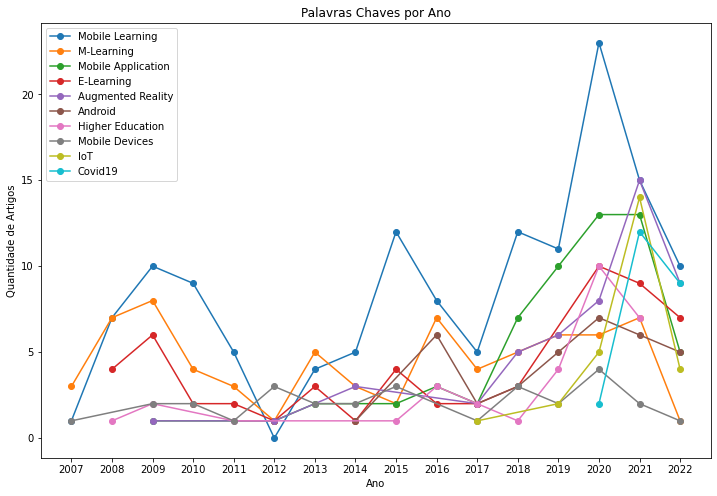

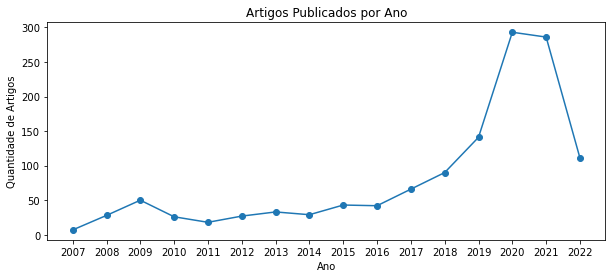

In [7]:
def keywordtimeline(dataframe,keyword):
    temp_df = dataframe
    temp_df = temp_df.where(temp_df == keyword, '')
    temp_df = temp_df.sum(axis=1)
    temp_df = temp_df.to_frame()
    temp_df = temp_df.replace('', np.nan, regex=True)
    temp_df['year'] = articles_df['publishing_date'].str[0:4]
    temp_df = temp_df.dropna(axis=0)
    keyword_timeline = temp_df['year'].value_counts()
    keyword_timeline = keyword_timeline.to_frame()
    keyword_timeline = keyword_timeline.sort_index()
    return keyword_timeline

import matplotlib.pyplot as plt

# generating dataset with keywords

articles_keywords = articles_df['keywords'].str.split(',', expand=True)
articles_keywords = articles_keywords.replace(' ','', regex=True)
articles_keywords = articles_keywords.replace('',np.nan, regex=True)
articles_keywords_2 = articles_keywords.stack()
count = articles_keywords_2.value_counts()

display(count.head(15))
articles_keywords_2.to_csv('keywords_stacked.csv')
articles_keywords.to_csv('keywords_split.csv')
count.to_csv('keywords_count.csv')

total_articles = articles_df['publishing_date'].str[0:4]
total_timeline = total_articles.value_counts()
total_timeline = total_timeline.to_frame()
total_timeline = total_timeline.sort_index()


# criando os dados para plotagem de cada palavra 
# chave usando a função keywordtimeline
mobilelearning = keywordtimeline(articles_keywords,"mobilelearning")
mlearning = keywordtimeline(articles_keywords,"mlearning")
mobileapplication = keywordtimeline(articles_keywords,"mobileapplication")
elearning = keywordtimeline(articles_keywords,"elearning")
augmentedreality = keywordtimeline(articles_keywords,"augmentedreality")
android = keywordtimeline(articles_keywords,"android")
highereducation = keywordtimeline(articles_keywords,"highereducation")
mobiledevices = keywordtimeline(articles_keywords,"mobiledevices")
iot = keywordtimeline(articles_keywords,"iot")
covid19 = keywordtimeline(articles_keywords,"covid19")

mobilelearning.loc['2012'] = 0
mobilelearning = mobilelearning.sort_index()

# plt.figure(1,[8,6])
#

plt.figure(1,[12,8])
plt.plot(mobilelearning,'o-')
plt.plot(mlearning,'o-')
plt.plot(mobileapplication,'o-')
plt.plot(elearning,'o-')
plt.plot(augmentedreality,'o-')
plt.plot(android,'o-')
plt.plot(highereducation,'o-')
plt.plot(mobiledevices,'o-')
plt.plot(iot,'o-')
plt.plot(covid19,'o-')
plt.legend(["Mobile Learning", "M-Learning", "Mobile Application", "E-Learning", "Augmented Reality", "Android", "Higher Education", "Mobile Devices", "IoT", "Covid19"])
plt.title("Palavras Chaves por Ano")
plt.ylabel("Quantidade de Artigos")
plt.xlabel("Ano")

plt.figure(2,[10,4])
plt.plot(total_timeline,'o-')
plt.title("Artigos Publicados por Ano")
plt.ylabel("Quantidade de Artigos")
plt.xlabel("Ano")
# type(mlearning)
# articles_keywords[0] = articles_keywords[0] + articles_keywords[1] + 
# #articles_keywords[2] + articles_keywords[3] + articles_keywords[4] + 
# #articles_keywords[5] + articles_keywords[6] + articles_keywords[7] + 
# #articles_keywords[8] + articles_keywords[9] + articles_keywords[10] + 
# #articles_keywords[11] + articles_keywords[12] + articles_keywords[13] + 
# #articles_keywords[14] + articles_keywords[15]
# keywords = [mobilelearning , mlearning , mobileapplication , elearning , augmentedreality , android , highereducation ,
# mobiledevices , iot , covid19 , onlinelearning , internetofthings , mobile , virtualreality , smartphone]

In [5]:
pd.options.display.max_colwidth = 200  # set a value as your need

data_tfidf = articles_df_2
# Utilizando função CountVectorizer do sklearn
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
# Mapeando os termos do documento
cvec.fit(data_tfidf.abstract)
cvec_counts = cvec.transform(data_tfidf.abstract)
# Formando o dataframe com o TF de cada termo
tf_total = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': tf_total})

print(counts_df.sort_values(by='occurrences', ascending=False).head(10))

# Utilizando função TfidfTransformer do sklearn
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
transformed_weights = tfidf.fit_transform(cvec_counts)
# Formando o dataframe com o peso TF-IDF de cada termo
tf_idf_weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_tfidf = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': tf_idf_weights})

print(weights_tfidf.sort_values(by='weight', ascending=False).head(10))

counts_df.to_csv('tf_count.csv')
weights_tfidf.to_csv('tfidf_weights.csv')

# Count Vectorizer arguments that could be added 
# stop_words='english', min_df=1, max_df=.5, ngram_range=(1,3)

# Elements that could check the cvec vector
#list(islice(cvec.vocabulary_.items(), 20))
#print('sparse matrix shape:', cvec_counts.shape)
#print('nonzero count:', cvec_counts.nnz)
#print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

           term  occurrences
8134        use         2898
4451      learn         2512
4994      mobil         2089
7357    student         1815
7369      studi         1527
1068     applic         1316
2399    develop         1250
6528   research         1028
7509     system          944
7587  technolog          934
           term    weight
4451      learn  0.059924
4994      mobil  0.048202
7357    student  0.045940
8134        use  0.045283
1068     applic  0.032548
7369      studi  0.031667
2399    develop  0.027898
2692       educ  0.027595
7509     system  0.026676
7587  technolog  0.024981


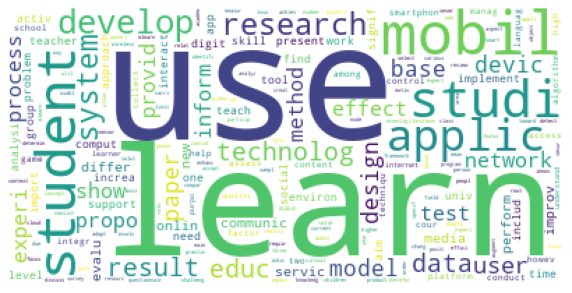

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
abstracts = articles_df_2['abstract']
all_abstracts = " ". join(abstracts)

wordcloud = WordCloud(collocations = False, background_color="white").generate(all_abstracts)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")